In [1]:
using ImmersedLayers

┌ Info: Precompiling ImmersedLayers [cdc13194-334e-4e1c-bc8d-fc3a28509c85]
└ @ Base loading.jl:1317


In [3]:
using CartesianGrids
using RigidBodyTools
using Plots
using UnPack
using LinearAlgebra

In [5]:
Δx = 0.01
Lx = 4.0
xlim = (-Lx/2,Lx/2)
ylim = (-Lx/2,Lx/2)
grid = PhysicalGrid(xlim,ylim,Δx);

In [6]:
RadC = Lx/4
Δs = 1.4*cellsize(grid);
body = Circle(RadC,Δs);

angs(n) = range(0,2π,length=n+1)[1:n];

In [7]:
cache = SurfaceScalarCache(body,grid,scaling=GridScaling);

In [8]:
s = zeros_surface(cache);

In [9]:
pts = points(cache)
gx = zeros_grid(cache)
@time regularize!(gx,pts.u,cache);

  0.125672 seconds (289.14 k allocations: 18.932 MiB, 10.02% gc time, 99.36% compilation time)


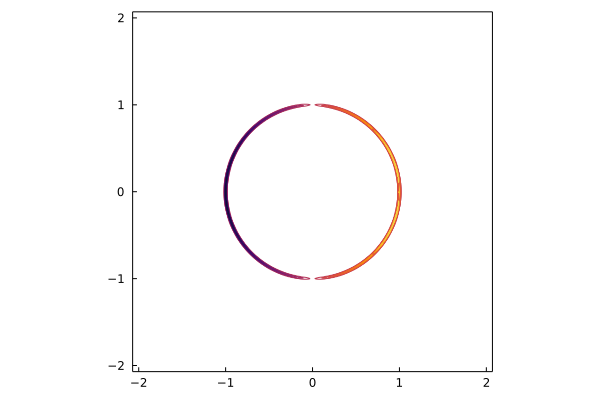

In [10]:
plot(gx,grid,levels=range(-50,50,length=30))

In [11]:
oc = 2.5*ones_grid(cache)

Nodes{Primal, 416, 416, Float64, Matrix{Float64}} data
Printing in grid orientation (lower left is (1,1))
415×415 Matrix{Float64}:
 2.5  2.5  2.5  2.5  2.5  2.5  2.5  2.5  …  2.5  2.5  2.5  2.5  2.5  2.5  2.5
 2.5  2.5  2.5  2.5  2.5  2.5  2.5  2.5     2.5  2.5  2.5  2.5  2.5  2.5  2.5
 2.5  2.5  2.5  2.5  2.5  2.5  2.5  2.5     2.5  2.5  2.5  2.5  2.5  2.5  2.5
 2.5  2.5  2.5  2.5  2.5  2.5  2.5  2.5     2.5  2.5  2.5  2.5  2.5  2.5  2.5
 2.5  2.5  2.5  2.5  2.5  2.5  2.5  2.5     2.5  2.5  2.5  2.5  2.5  2.5  2.5
 2.5  2.5  2.5  2.5  2.5  2.5  2.5  2.5  …  2.5  2.5  2.5  2.5  2.5  2.5  2.5
 2.5  2.5  2.5  2.5  2.5  2.5  2.5  2.5     2.5  2.5  2.5  2.5  2.5  2.5  2.5
 2.5  2.5  2.5  2.5  2.5  2.5  2.5  2.5     2.5  2.5  2.5  2.5  2.5  2.5  2.5
 2.5  2.5  2.5  2.5  2.5  2.5  2.5  2.5     2.5  2.5  2.5  2.5  2.5  2.5  2.5
 2.5  2.5  2.5  2.5  2.5  2.5  2.5  2.5     2.5  2.5  2.5  2.5  2.5  2.5  2.5
 2.5  2.5  2.5  2.5  2.5  2.5  2.5  2.5  …  2.5  2.5  2.5  2.5  2.5  2.5  2.5
 2.5  2.5  

In [12]:
x, y = coordinates(oc,grid)
xg = similar(oc)
xg .= x

Nodes{Primal, 416, 416, Float64, Matrix{Float64}} data
Printing in grid orientation (lower left is (1,1))
415×415 Matrix{Float64}:
 -2.07  -2.06  -2.05  -2.04  -2.03  …  2.02  2.03  2.04  2.05  2.06  2.07
 -2.07  -2.06  -2.05  -2.04  -2.03     2.02  2.03  2.04  2.05  2.06  2.07
 -2.07  -2.06  -2.05  -2.04  -2.03     2.02  2.03  2.04  2.05  2.06  2.07
 -2.07  -2.06  -2.05  -2.04  -2.03     2.02  2.03  2.04  2.05  2.06  2.07
 -2.07  -2.06  -2.05  -2.04  -2.03     2.02  2.03  2.04  2.05  2.06  2.07
 -2.07  -2.06  -2.05  -2.04  -2.03  …  2.02  2.03  2.04  2.05  2.06  2.07
 -2.07  -2.06  -2.05  -2.04  -2.03     2.02  2.03  2.04  2.05  2.06  2.07
 -2.07  -2.06  -2.05  -2.04  -2.03     2.02  2.03  2.04  2.05  2.06  2.07
 -2.07  -2.06  -2.05  -2.04  -2.03     2.02  2.03  2.04  2.05  2.06  2.07
 -2.07  -2.06  -2.05  -2.04  -2.03     2.02  2.03  2.04  2.05  2.06  2.07
 -2.07  -2.06  -2.05  -2.04  -2.03  …  2.02  2.03  2.04  2.05  2.06  2.07
 -2.07  -2.06  -2.05  -2.04  -2.03     2.02  2.03  2.04

In [13]:
f = similar_surface(cache);
interpolate!(f,xg,cache)

448 points of scalar-valued Float64 data
448-element Vector{Float64}:
 1.0000000000000002
 0.9999016517595748
 0.9996066263830523
 0.9991149819008859
 0.9984268150178163
 0.9975422610938456
 0.9964614941176191
 0.9951847266721969
 0.9937122098932417
 0.9920442334196241
 0.9901811253364453
 0.988123252110508
 0.9858710185182359
 ⋮
 0.9858710185182358
 0.988123252110508
 0.9901811253364452
 0.9920442334196244
 0.9937122098932415
 0.9951847266721967
 0.9964614941176191
 0.9975422610938454
 0.9984268150178163
 0.9991149819008862
 0.9996066263830522
 0.9999016517595745

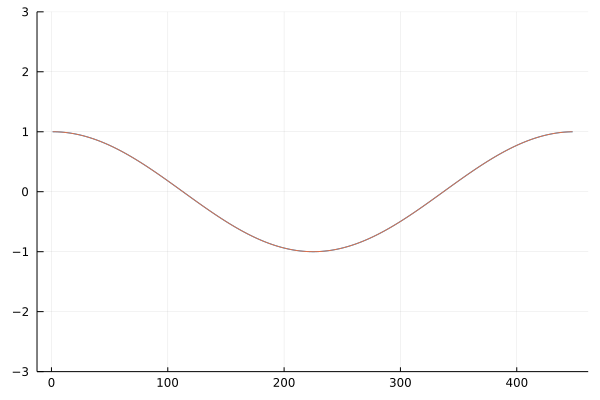

In [14]:
plot(f,ylim=(-3,3),legend=false)
plot!(pts.u)

In [15]:
gd = zeros_grid(cache)
f = ones_surface(cache)
surface_divergence!(gd,f,cache);

In [18]:
norm(gd,cache)

1669.3208762660322

In [23]:
gc = zeros_gridcurl(cache)
f = ones_surface(cache)
surface_curl!(gc,pts.v,cache);

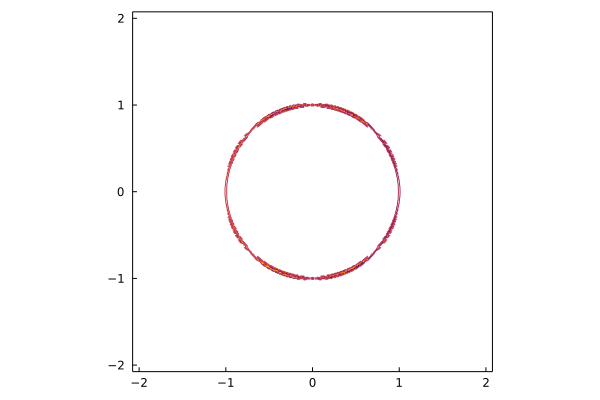

In [24]:
plot(gc,cache.g)

In [21]:
norm(gc,cache)/norm(gd,cache)

0.029177552107562017

In [25]:
gd = zeros_grid(cache)
grid_interpolate!(gd,gc)
interpolate!(f,gd,cache);

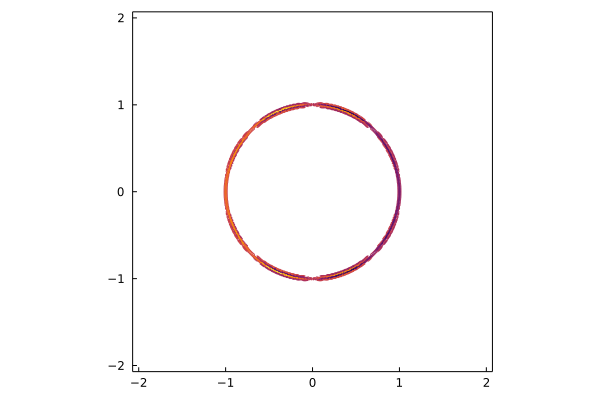

In [27]:
plot(gd,cache.g)

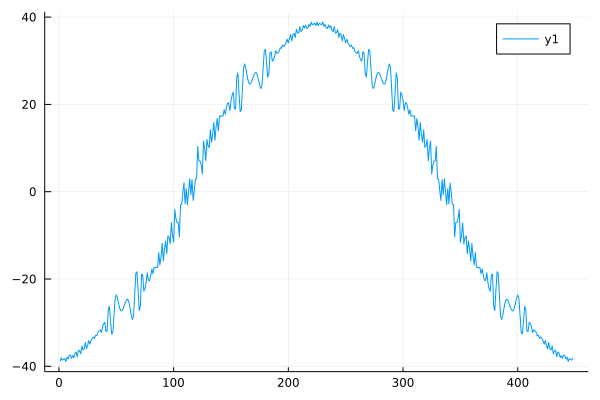

In [26]:
plot(f)

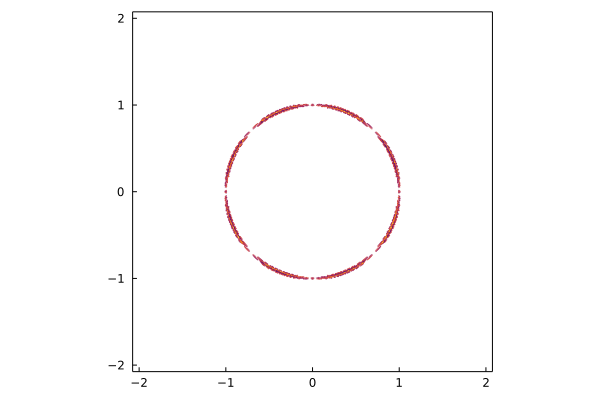

In [82]:
plot(gc,cache.g,levels=range(-1000,1000,length=20))

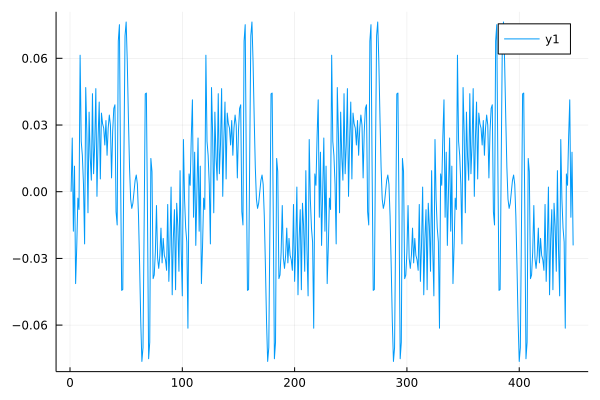

In [53]:
plot(interpolate!(f,gd,cache))

In [34]:
maximum(gc)

434.4237761570035

In [31]:
interpolate!(f,gc,cache)

LoadError: MethodError: no method matching interpolate!(::ScalarData{448, Float64, Vector{Float64}}, ::Nodes{Dual, 416, 416, Float64, Matrix{Float64}}, ::BasicILMCache{448, GridScaling, 2, VectorData{448, Float64, Vector{Float64}}, VectorData{448, Float64, Vector{Float64}}, Regularize{448, false}, RegularizationMatrix{Edges{Primal, 416, 416, Float64, Vector{Float64}}, VectorData{448, Float64, Vector{Float64}}}, InterpolationMatrix{Edges{Primal, 416, 416, Float64, Vector{Float64}}, VectorData{448, Float64, Vector{Float64}}}, RegularizationMatrix{Nodes{Primal, 416, 416, Float64, Matrix{Float64}}, ScalarData{448, Float64, Vector{Float64}}}, InterpolationMatrix{Nodes{Primal, 416, 416, Float64, Matrix{Float64}}, ScalarData{448, Float64, Vector{Float64}}}, CartesianGrids.Laplacian{416, 416, Float64, true, false}, Edges{Primal, 416, 416, Float64, Vector{Float64}}, Nodes{Dual, 416, 416, Float64, Matrix{Float64}}, Nodes{Primal, 416, 416, Float64, Matrix{Float64}}, VectorData{448, Float64, Vector{Float64}}, ScalarData{448, Float64, Vector{Float64}}})
[0mClosest candidates are:
[0m  interpolate!(::Any, ::Any, [91m::ILMSystem[39m) at /Users/jeff/JuliaProjects/ImmersedLayers/src/surface_operators.jl:2
[0m  interpolate!(::ScalarData, [91m::Nodes{Primal, NX, NY, T, DT} where {NX, NY, T<:Number, DT<:(AbstractMatrix{T} where T)}[39m, ::BasicILMCache) at /Users/jeff/JuliaProjects/ImmersedLayers/src/surface_operators.jl:38
[0m  interpolate!(::ScalarData, [91m::Nodes{Primal, NX, NY, T, DT} where {NX, NY, T<:Number, DT<:(AbstractMatrix{T} where T)}[39m, [91m::InterpolationMatrix[39m) at /Users/jeff/JuliaProjects/ImmersedLayers/src/surface_operators.jl:40
[0m  ...

In [32]:
volume(cache.g)

17.139599999999998

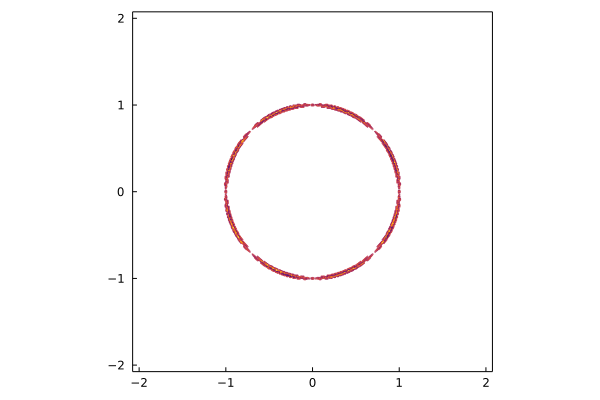

In [29]:
plot(gc,cache.g)

In [30]:
norm(gc,cache)

66.93745867146109

In [13]:
prob = BasicScalarILMProblem(g,body,scaling=GridScaling)

BasicScalarILMProblem{CartesianGrids.Yang3, GridScaling}(PhysicalGrid{2}((104, 104), (52, 52), 0.04, ((-2.04, 2.04), (-2.04, 2.04))), BodyList(Body[Circular body with 112 points and radius 1.0
   Current position: (0.0,0.0)
   Current angle (rad): 0.0
]))

In [14]:
sys = ImmersedLayers.__init(prob)

ILMSystem{BasicScalarILMProblem{CartesianGrids.Yang3, GridScaling}, BasicILMCache{112, GridScaling, 2, VectorData{112, Float64, Vector{Float64}}, Regularize{112, false}, RegularizationMatrix{Edges{Primal, 104, 104, Float64, Vector{Float64}}, VectorData{112, Float64, Vector{Float64}}}, InterpolationMatrix{Edges{Primal, 104, 104, Float64, Vector{Float64}}, VectorData{112, Float64, Vector{Float64}}}, RegularizationMatrix{Nodes{Primal, 104, 104, Float64, Matrix{Float64}}, ScalarData{112, Float64, Vector{Float64}}}, InterpolationMatrix{Nodes{Primal, 104, 104, Float64, Matrix{Float64}}, ScalarData{112, Float64, Vector{Float64}}}, CartesianGrids.Laplacian{104, 104, Float64, true, false}, Edges{Primal, 104, 104, Float64, Vector{Float64}}, Nodes{Dual, 104, 104, Float64, Matrix{Float64}}, Nodes{Primal, 104, 104, Float64, Matrix{Float64}}, VectorData{112, Float64, Vector{Float64}}, ScalarData{112, Float64, Vector{Float64}}}, Nothing}(Surface cache with scaling of type GridScaling
  112 point data

In [15]:

X = VectorData(collect(body))

w = Nodes(Dual,size(g))
ϕ = Nodes(Primal,size(g))
q = Edges(Primal,size(g))
f = ScalarData(X);


In [23]:
ones(q,2)

Edges{Primal, 104, 104, Float64, Vector{Float64}} data
u (in grid orientation)
103×104 Matrix{Float64}:
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.

In [19]:
f .= 1.0;

In [20]:
@time regularize!(ϕ,f,sys);

  0.000047 seconds (8 allocations: 166.125 KiB)


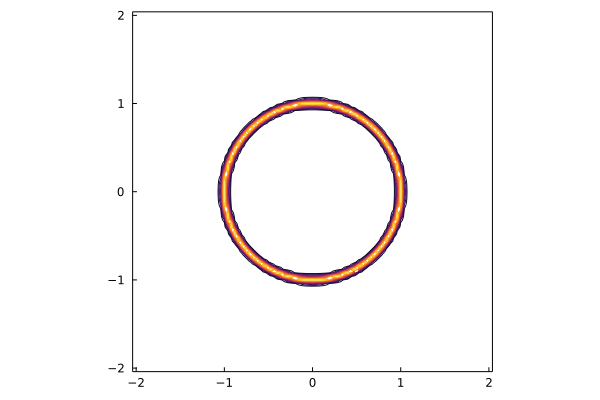

In [21]:
plot(ϕ,g)

In [22]:
f2 = ScalarData(X);
interpolate!(f2,ϕ,sys);

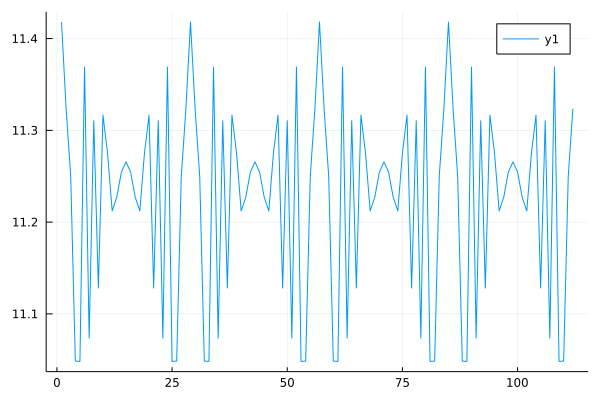

In [23]:
plot(f2)

In [6]:
#scache = SurfaceScalarCache(body,g,scaling=GridScaling);

In [15]:
A = CLinvCT(sys.base_cache,scale=cellsize(g));

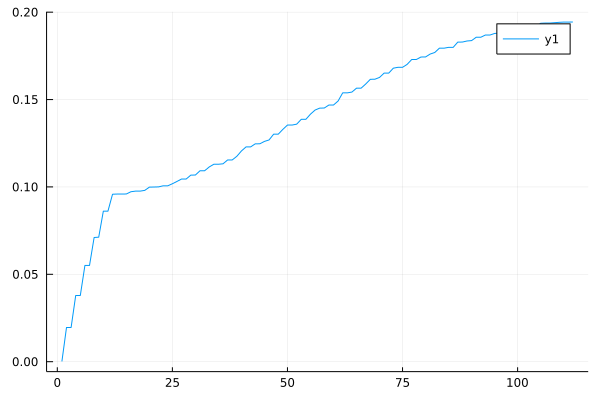

In [16]:
plot(eigvals(A))

In [8]:
f .= sin.(angs(length(body)) .- π/4)
  regularize_normal!(q,f,sys)
  normal_interpolate!(f,q,sys)
maximum(f)

11.257138642758864

In [9]:
A = CLinvCT(sys.base_cache,scale=cellsize(g));

In [10]:
minimum(eigvals(A))

0.000150427916405317

In [11]:
A = GLinvD(sys.base_cache,scale=cellsize(g));

In [12]:
minimum(eigvals(A))

0.01681750672504113

In [13]:
A = nRTRn(sys.base_cache);

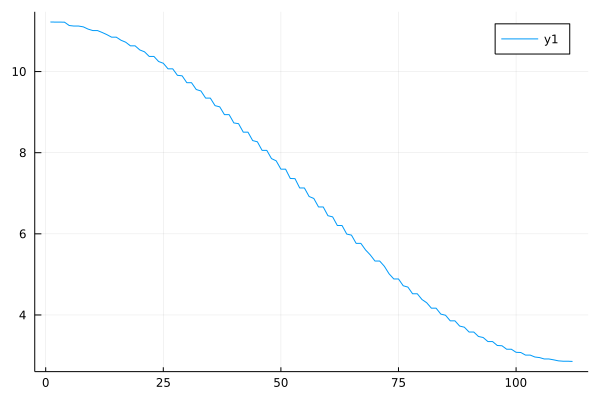

In [14]:
plot(svdvals(A))

In [15]:
@unpack base_cache = sys
@unpack L, regop = base_cache
Rn = RegularizationMatrix(regop,f,w);

f .= sin.(angs(length(body)) .- π/4);

A = CLinvCT(base_cache,scale=cellsize(g));

surface_curl!(f,L\(Rn*f),sys);
surface_divergence!(ϕ,ScalarData(A\f),sys);
ϕ .= L\ϕ;

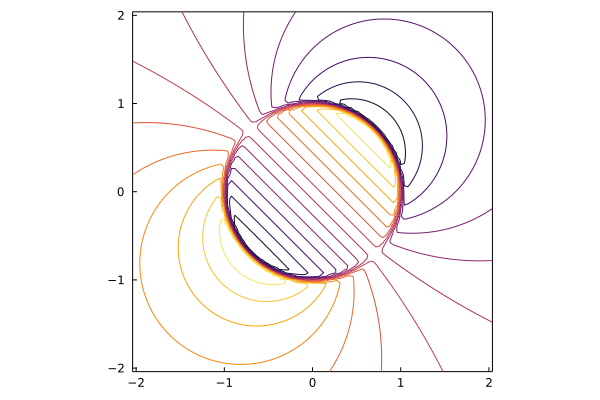

In [16]:
plot(ϕ,g)

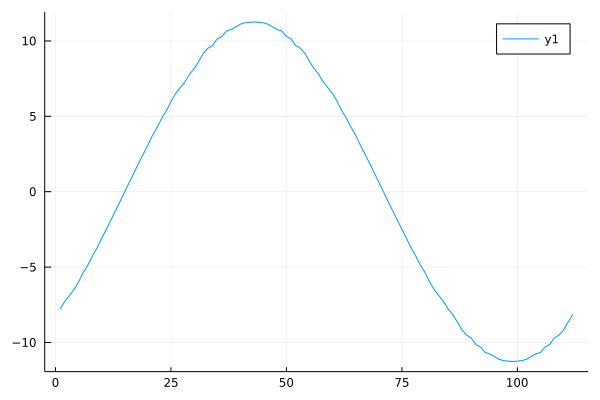

In [17]:
f .= sin.(angs(length(body)) .- π/4);

regularize_normal!(q,f,sys)
normal_interpolate!(f,q,sys)
plot(f)

In [5]:
vprob = BasicVectorILMProblem(g,body,scaling=GridScaling)
vsys = ImmersedLayers.__init(vprob)

ImmersedLayers.ILMSystem{ImmersedLayers.BasicILMCache{112, GridScaling, 2, VectorData{112, Float64, Vector{Float64}}, Regularize{112, false}, RegularizationMatrix{EdgeGradient{Primal, Dual, 104, 104, Float64, Vector{Float64}}, TensorData{112, Float64, Vector{Float64}}}, InterpolationMatrix{EdgeGradient{Primal, Dual, 104, 104, Float64, Vector{Float64}}, TensorData{112, Float64, Vector{Float64}}}, CartesianGrids.Laplacian{104, 104, Float64, true, false}, EdgeGradient{Primal, Dual, 104, 104, Float64, Vector{Float64}}, Nodes{Dual, 104, 104, Float64, Matrix{Float64}}, Edges{Primal, 104, 104, Float64, Vector{Float64}}, TensorData{112, Float64, Vector{Float64}}, VectorData{112, Float64, Vector{Float64}}}, Nothing}(Surface cache with scaling of type GridScaling
  112 point data of type VectorData{112, Float64, Vector{Float64}}
  Grid data of type Edges{Primal, 104, 104, Float64, Vector{Float64}}
, nothing)

In [8]:
dq = EdgeGradient(Primal,size(g));
q = Edges(Primal,size(g));
vs = VectorData(X)
vs.u .= sin.(angs(length(body)) .- π/4);

In [9]:
regularize_normal!(dq,vs,vsys);

In [10]:
normal_interpolate!(vs,dq,vsys);

In [11]:
maximum(vs.u)

38.63806757026098

In [12]:
surface_divergence!(q,vs,vsys);

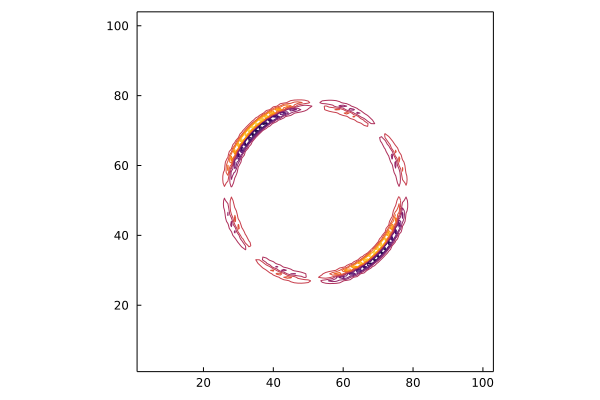

In [13]:
plot(q.v)

In [14]:
normal_interpolate!(vs,dq,vsys);

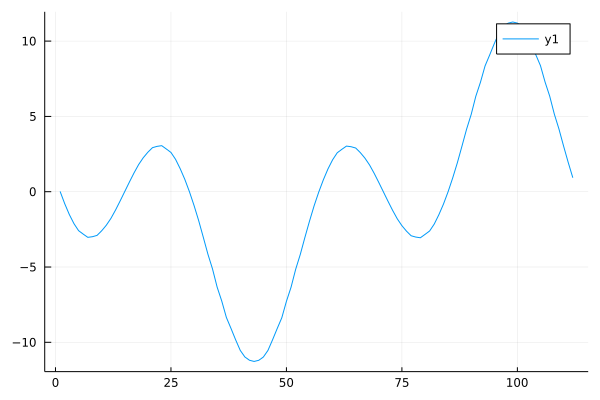

In [15]:
plot(vs.v)

In [16]:
surface_grad!(vs,q,vsys);

In [17]:
A = GLinvD(vsys.base_cache,scale=cellsize(g));

In [18]:
maximum(eigvals(A))

1.719348873334648

In [19]:
A = nRTRn(vsys.base_cache);

### Masks

In [23]:
msk = mask(sys.base_cache);

In [25]:
maximum(msk)

0.9996961448035

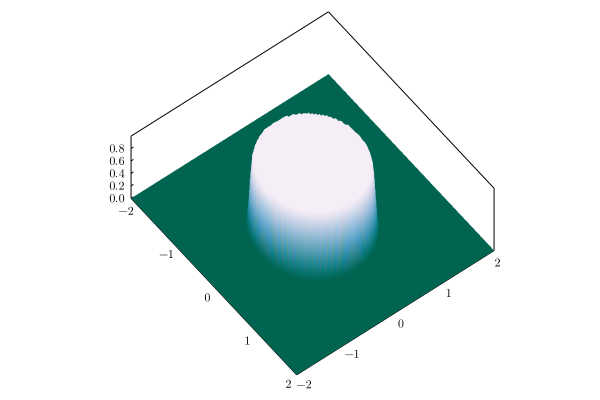

In [26]:
xg, yg = coordinates(msk,g)
psurf = surface(xg,yg,msk,camera=(50,80),color=cgrad(:PuBuGn_7,rev=true),formatter=:latex)

In [27]:
w = Nodes(Primal,size(g))
w .= 2.0
complementary_mask!(w,sys.base_cache);

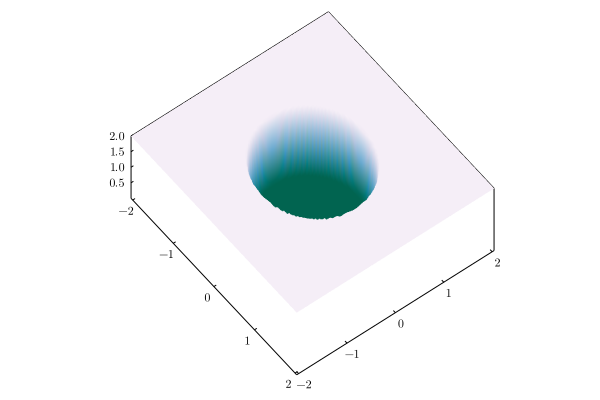

In [28]:
psurf = surface(xg,yg,w,camera=(50,80),color=cgrad(:PuBuGn_7,rev=true),formatter=:latex)

In [18]:
oc = similar(w)
oc .= 1.0
abs(dot(oc,msk,g) - π*RadC^2)

0.0016796433828321078

### Define a problem type and associated extra cache

In [8]:
struct MyScalarILMProblem{DT,ST} <: ImmersedLayers.AbstractScalarILMProblem{DT,ST}
   g :: PhysicalGrid
   bodies :: BodyList
   MyScalarILMProblem(g::PT,bodies::BodyList;ddftype=CartesianGrids.Yang3,scaling=IndexScaling) where {PT} = new{ddftype,scaling}(g,bodies)
   MyScalarILMProblem(g::PT,body::Body;ddftype=CartesianGrids.Yang3,scaling=IndexScaling) where {PT} = new{ddftype,scaling}(g,BodyList([body]))
end

struct MyExtraCache{CT,RT,ET} <: ImmersedLayers.AbstractExtraILMCache
   CLinvCT :: CT
   Rn :: RT
   En :: ET 
end

function ImmersedLayers.prob_cache(prob::MyScalarILMProblem,base_cache::ImmersedLayers.BasicILMCache)
    @unpack g, regop,gcurl_cache,sdata_cache  = base_cache
    A = CLinvCT(base_cache,scale=cellsize(g))
    Rn = RegularizationMatrix(regop,sdata_cache,gcurl_cache)
    En = InterpolationMatrix(regop,gcurl_cache,sdata_cache)
    MyExtraCache(A,Rn,En)
end

In [9]:
prob = MyScalarILMProblem(g,body,scaling=GridScaling)

MyScalarILMProblem{CartesianGrids.Yang3, GridScaling}(PhysicalGrid{2}((104, 104), (52, 52), 0.04, ((-2.04, 2.04), (-2.04, 2.04))), BodyList(Body[Circular body with 112 points and radius 1.0
   Current position: (0.0,0.0)
   Current angle (rad): 0.0
]))

In [10]:
sys = ImmersedLayers.__init(prob);

In [11]:
function sheet_to_scapot!(ϕ::Nodes{Primal},f::ScalarData,sys::ImmersedLayers.ILMSystem{<:MyScalarILMProblem})
    @unpack base_cache, extra_cache = sys
    @unpack CLinvCT, Rn = extra_cache
    @unpack gcurl_cache, sdata_cache = base_cache
    
    gcurl_cache .= Rn*f
    inverse_laplacian!(gcurl_cache,sys)
    fill!(sdata_cache,0.0)
    surface_curl!(sdata_cache,gcurl_cache,sys)
    surface_divergence!(ϕ,ScalarData(CLinvCT\sdata_cache),sys)
    inverse_laplacian!(ϕ,sys)
end

sheet_to_scapot! (generic function with 1 method)

In [12]:
f .= sin.(angs(length(body)) .- π/4);
ϕ = Nodes(Primal,size(g));

In [13]:
sheet_to_scapot!(ϕ,f,sys);

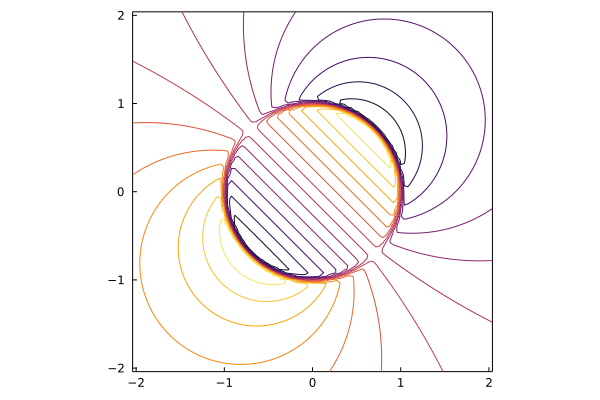

In [14]:
plot(ϕ,g)